In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/gold prices.csv", parse_dates=["Date"])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7


In [3]:
# df.Date = pd.to_datetime(df.Date, format='%d/%m/%y')
# df['Year'] = df.Date.dt.year
# df['Month'] = df.Date.dt.month
# df['Day'] = df.Date.dt.day
# df.head()

In [4]:
# df = df[df['Year'] != 2023]
# df = df[df['Year'] != 2013]
# df

In [5]:
# high = df.groupby(['Year'])['High'].mean()
# close = df.groupby(['Year'])['Close/Last'].mean()
# volume = df.groupby(['Year'])['Volume'].mean()
# open = df.groupby(['Year'])['Open'].mean()
# low = df.groupby(['Year'])['Low'].mean()

In [6]:
def Mean(df,Col):
    yearly_avg = df.groupby('Year')[Col].mean().reset_index()
    df = df.merge(yearly_avg, on='Year', how='left', suffixes=('', '_Yearly_Avg'))
    
    return df

def Add_col(df,year):
    x = df.loc[df['Year'] == year]
    x = x.head(1)
    return x

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df = Mean(df,'Low')
df = Mean(df,'High')
df = Mean(df,'Open')
df = Mean(df,'Volume')
df = Mean(df,'Close/Last')

df = df.drop(columns=['Date','Close/Last','Volume','Open','High','Low','Month'])
df

,Year,Low_Yearly_Avg,High_Yearly_Avg,Open_Yearly_Avg,Volume_Yearly_Avg,Close/Last_Yearly_Avg
0,2023,1931.266879,1957.170064,1944.179618,167933.318471,1943.963694
1,2023,1931.266879,1957.170064,1944.179618,167933.318471,1943.963694
2,2023,1931.266879,1957.170064,1944.179618,167933.318471,1943.963694
3,2023,1931.266879,1957.170064,1944.179618,167933.318471,1943.963694
4,2023,1931.266879,1957.170064,1944.179618,167933.318471,1943.963694
...,...,...,...,...,...,...
2534,2013,1289.536082,1312.913402,1302.063918,127009.096774,1300.756701
2535,2013,1289.536082,1312.913402,1302.063918,127009.096774,1300.756701
2536,2013,1289.536082,1312.913402,1302.063918,127009.096774,1300.756701
2537,2013,1289.536082,1312.913402,1302.063918,127009.096774,1300.756701


In [8]:
x22 = Add_col(df,2022)
x21 = Add_col(df,2021)
x20 = Add_col(df,2020)
x19 = Add_col(df,2019)
x18 = Add_col(df,2018)
x17 = Add_col(df,2017)
x16 = Add_col(df,2016)
x15 = Add_col(df,2015)
x14 = Add_col(df,2014)

result = pd.concat([x22, x21,x20,x19,x18,x17,x16,x15,x14], ignore_index=True)
result

,Year,Low_Yearly_Avg,High_Yearly_Avg,Open_Yearly_Avg,Volume_Yearly_Avg,Close/Last_Yearly_Avg
0,2022,1793.579283,1820.363745,1807.468526,161591.056452,1806.991633
1,2021,1788.387698,1809.985317,1799.994444,179240.408730,1799.410317
2,2020,1763.453755,1793.326877,1779.015415,213228.476190,1779.100791
3,2019,1389.643254,1403.909524,1396.484127,224530.722222,1397.123016
4,2018,1265.284524,1277.856746,1271.723016,241842.536000,1271.561111
5,2017,1253.710359,1266.622709,1260.161753,234966.892430,1260.572112
6,2016,1242.301984,1261.130952,1250.996032,178144.186508,1251.715079
7,2015,1151.719157,1167.427203,1159.686590,128677.384921,1159.170498
8,2014,1257.596552,1274.312644,1265.717241,122787.384921,1266.059387


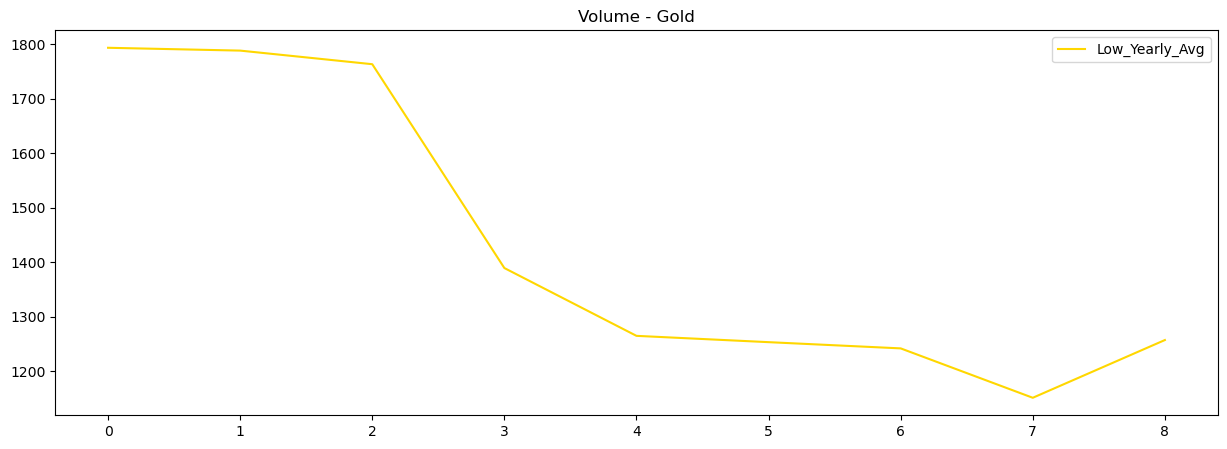

In [9]:
result[["Low_Yearly_Avg"]].plot(style="-", figsize=(15, 5), title="Volume - Gold", color = 'gold')
plt.show()

In [10]:
LYA = result[['Year','Low_Yearly_Avg']].sort_values(by='Low_Yearly_Avg', ascending=True)
HYA = result[['Year','High_Yearly_Avg']]
OYA = result[['Year','Open_Yearly_Avg']]
VYA = result[['Year','Volume_Yearly_Avg']]
CYA = result[['Year','Close/Last_Yearly_Avg']]

In [11]:
LYA

,Year,Low_Yearly_Avg
7,2015,1151.719157
6,2016,1242.301984
5,2017,1253.710359
8,2014,1257.596552
4,2018,1265.284524
3,2019,1389.643254
2,2020,1763.453755
1,2021,1788.387698
0,2022,1793.579283


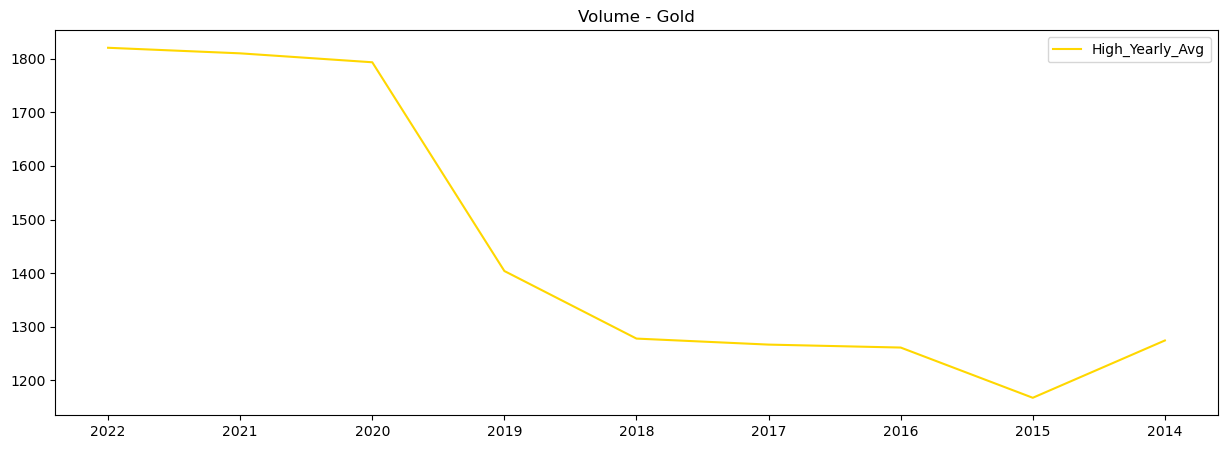

In [12]:
HYA[["High_Yearly_Avg"]].plot(style="-", figsize=(15, 5), title="Volume - Gold", color = 'gold')
plt.xticks(HYA.index, HYA['Year'])
plt.show()

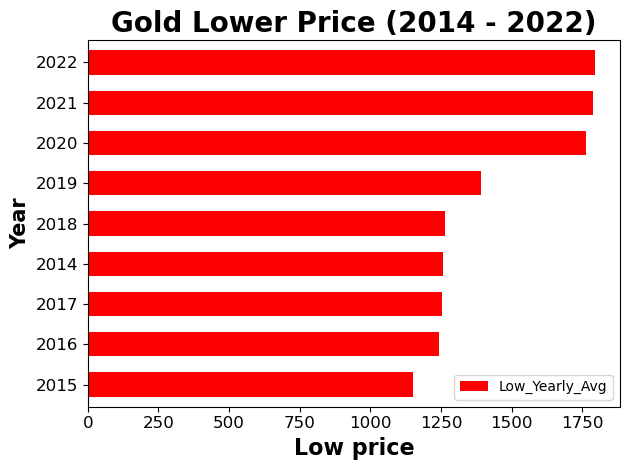

In [13]:
LYA.plot.barh(x='Year', y='Low_Yearly_Avg', stacked = True, color = '#FF0000', width = 0.6)

plt.title('Gold Lower Price (2014 - 2022)', fontsize = 20, weight = 'bold')
plt.xlabel('Low price', fontsize=16, weight='bold')
plt.ylabel('Year', fontsize=15, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

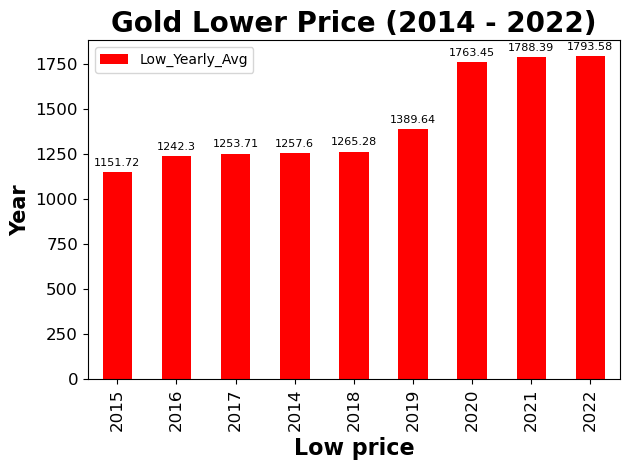

In [14]:
ax = LYA.plot(kind='bar', x='Year', y='Low_Yearly_Avg', stacked = True, color = '#FF0000')

for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', color='black', fontsize=8, padding=3)
    
plt.title('Gold Lower Price (2014 - 2022)', fontsize = 20, weight = 'bold')
plt.xlabel('Low price', fontsize=16, weight='bold')
plt.ylabel('Year', fontsize=15, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

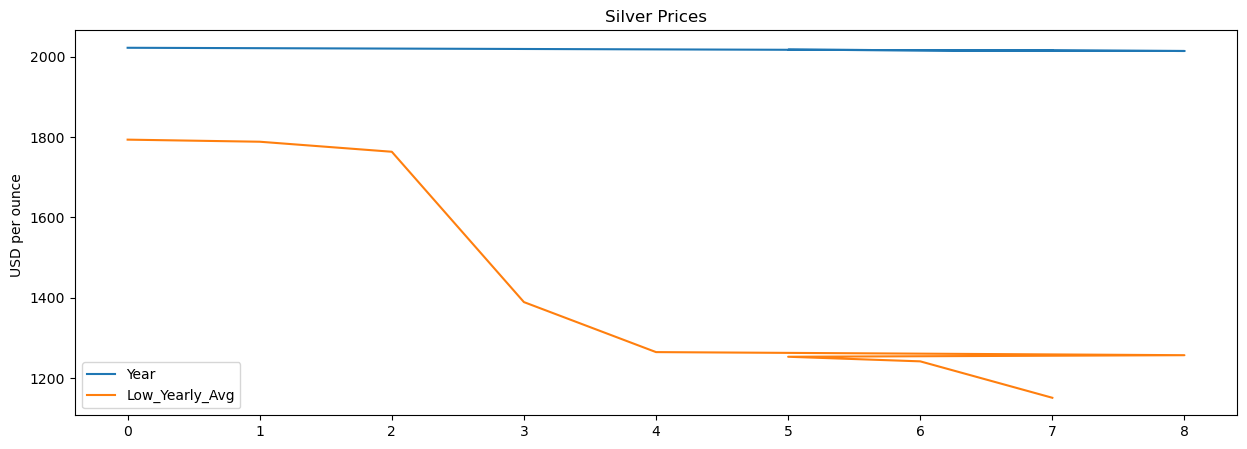

In [15]:
ax = LYA.plot(figsize=(15,5))
# ax.legend(["High", "Open", "Low"])
ax.set_title("Silver Prices")
plt.ylabel('USD per ounce ') 
plt.show()